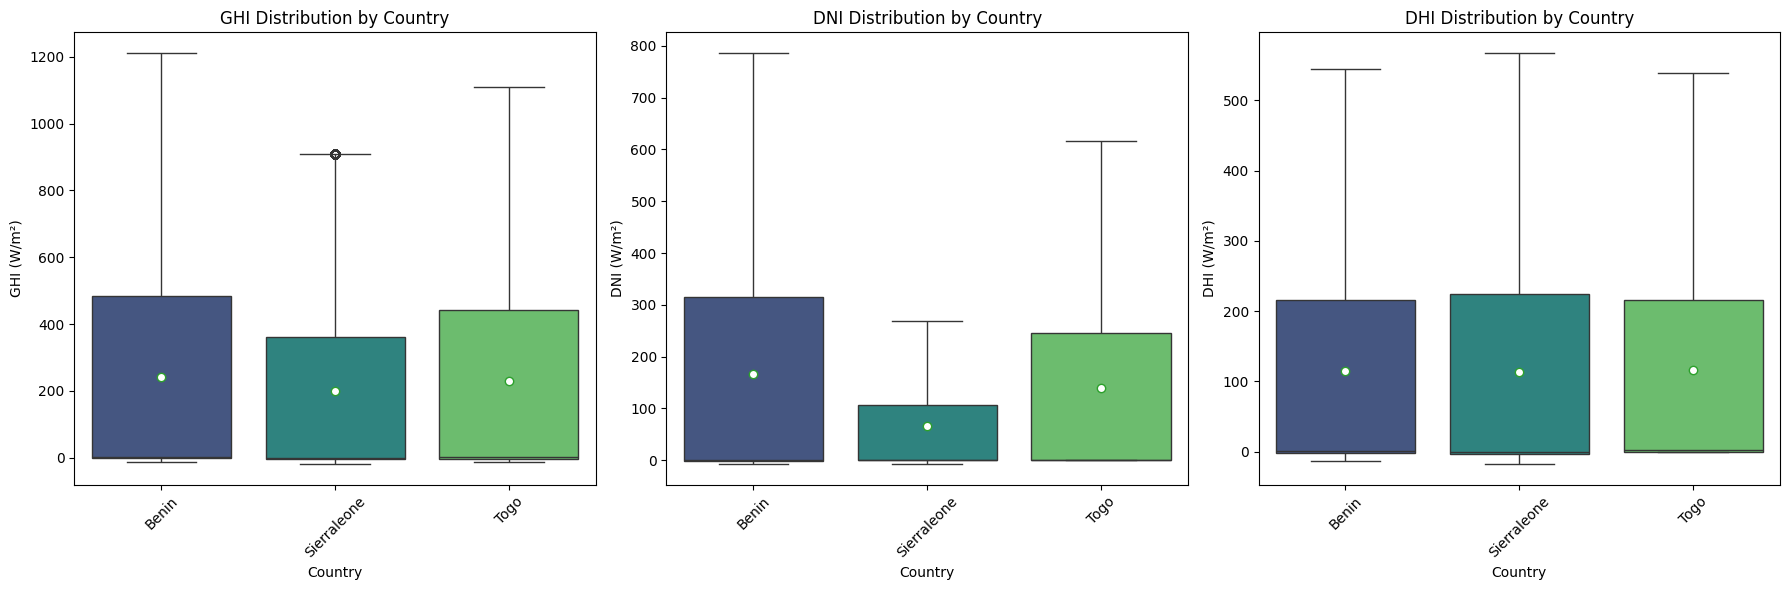

In [2]:
# compare_countries.ipynb (Fixed Version)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# 1. Load cleaned datasets
countries = ['benin', 'sierraleone', 'togo']
dfs = {}

for country in countries:
    file_path = f'../data/{country}_clean.csv'
    if os.path.exists(file_path):
        dfs[country] = pd.read_csv(file_path)
        dfs[country]['Country'] = country.capitalize()
    else:
        print(f"Warning: {file_path} not found")

# Combine all data
combined_df = pd.concat(dfs.values(), ignore_index=True)

# 2. Boxplots
plt.figure(figsize=(18, 6))
metrics = ['GHI', 'DNI', 'DHI']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=combined_df,
                hue='Country', 
                palette='viridis',
                showmeans=True,
                meanprops={'marker':'o', 'markerfacecolor':'white'},
                legend=False)  
    plt.title(f'{metric} Distribution by Country')
    plt.ylabel(f'{metric} (W/m²)')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [4]:
# Complete Country Comparison with Pairwise p-values
from scipy import stats
import itertools

# 1. Get GHI data for all countries
country_data = {
    country: dfs[country]['GHI'].dropna()
    for country in ['benin', 'sierraleone', 'togo'] 
    if country in dfs
}

# 2. Overall Kruskal-Wallis test (non-parametric)
print("Overall Test:")
h_stat, overall_p = stats.kruskal(*country_data.values())
print(f"Kruskal-Wallis p-value: {overall_p:.6f}\n")

# 3. Pairwise comparisons
print("Pairwise Comparisons:")
for (country1, data1), (country2, data2) in itertools.combinations(country_data.items(), 2):
    _, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided')
    print(f"{country1.capitalize()} vs {country2.capitalize()}: p = {p_value:.6f}")

Overall Test:
Kruskal-Wallis p-value: 0.000000

Pairwise Comparisons:
Benin vs Sierraleone: p = 0.000000
Benin vs Togo: p = 0.000000
Sierraleone vs Togo: p = 0.000000


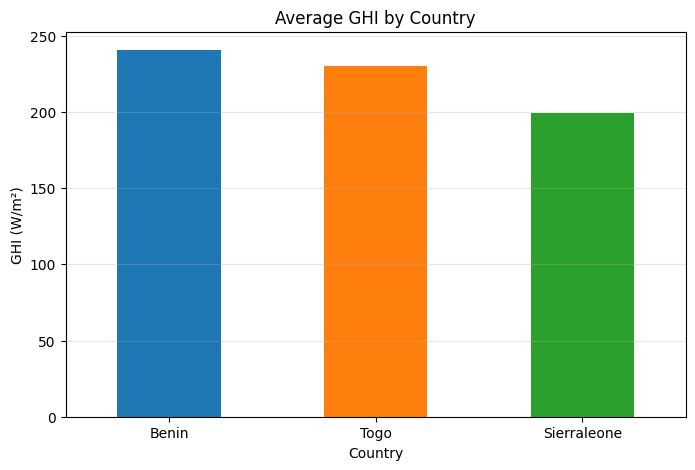

In [5]:
# 5. Bonus: GHI Ranking
plt.figure(figsize=(8, 5))
ghi_means = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
ghi_means.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average GHI by Country')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()